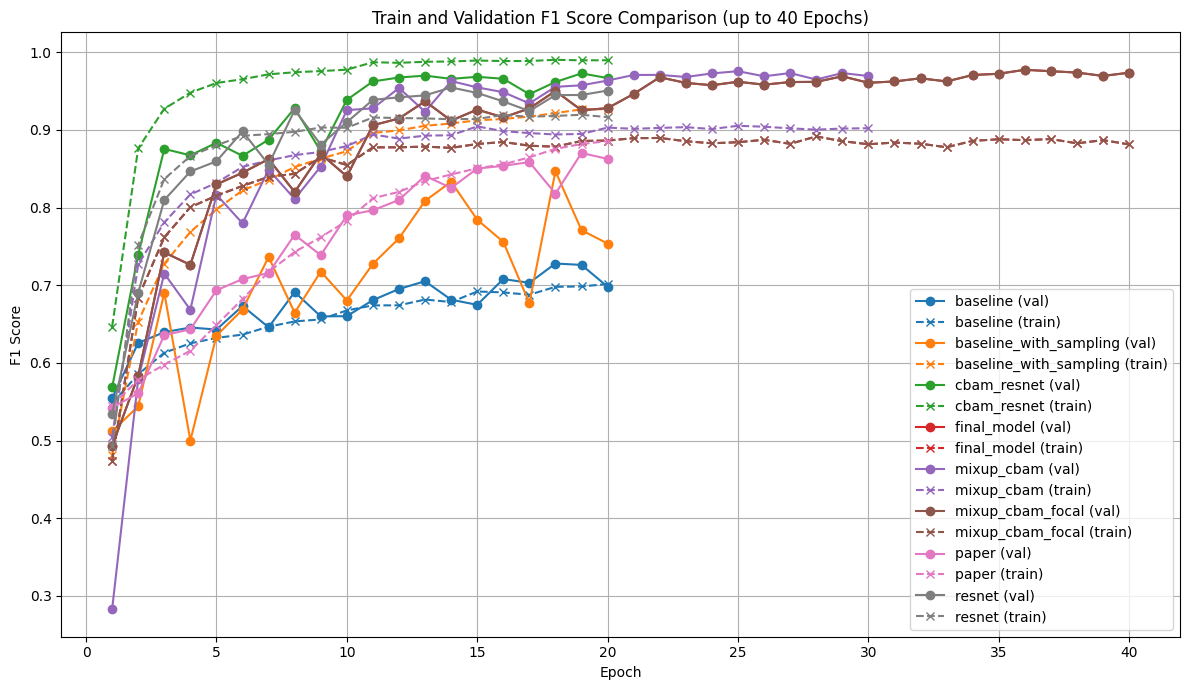

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import glob
import os

folder_path = "checkpoints/"
csv_files = glob.glob(os.path.join(folder_path, "*.csv"))

plt.figure(figsize=(12, 7))
max_epochs = 40

# Colormap for consistent color assignment
colors = plt.cm.tab10.colors  # You can also use plt.cm.Set2, etc.
color_map = {}

for idx, file in enumerate(csv_files):
    try:
        df = pd.read_csv(file)
        model_name = os.path.splitext(os.path.basename(file))[0]
        df = df.iloc[:max_epochs]
        epochs = range(1, len(df) + 1)

        # Assign a consistent color
        color = colors[idx % len(colors)]
        color_map[model_name] = color

        if "val_f1" in df.columns:
            plt.plot(epochs, df["val_f1"], label=f"{model_name} (val)", color=color, marker='o')
        else:
            print(f"Skipping val_f1 for {file}: column not found.")

        if "train_f1" in df.columns:
            plt.plot(epochs, df["train_f1"], label=f"{model_name} (train)", color=color, linestyle='--', marker='x')
        else:
            print(f"Skipping train_f1 for {file}: column not found.")

    except Exception as e:
        print(f"Error reading {file}: {e}")

plt.xlabel("Epoch")
plt.ylabel("F1 Score")
plt.title("Train and Validation F1 Score Comparison (up to 40 Epochs)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [1]:
import pandas as pd

df = pd.read_csv("data/meta_train.csv")
df.head()

,image_id,label,variety,age
0,100330.jpg,bacterial_leaf_blight,ADT45,45
1,100365.jpg,bacterial_leaf_blight,ADT45,45
2,100382.jpg,bacterial_leaf_blight,ADT45,45
3,100632.jpg,bacterial_leaf_blight,ADT45,45
4,101918.jpg,bacterial_leaf_blight,ADT45,45


In [2]:
len(df)

10407

In [5]:
df["variety"].value_counts()

variety
ADT45             6992
KarnatakaPonni     988
Ponni              657
AtchayaPonni       461
Zonal              399
AndraPonni         377
Onthanel           351
IR20               114
RR                  36
Surya               32
Name: count, dtype: int64

<Axes: xlabel='variety'>

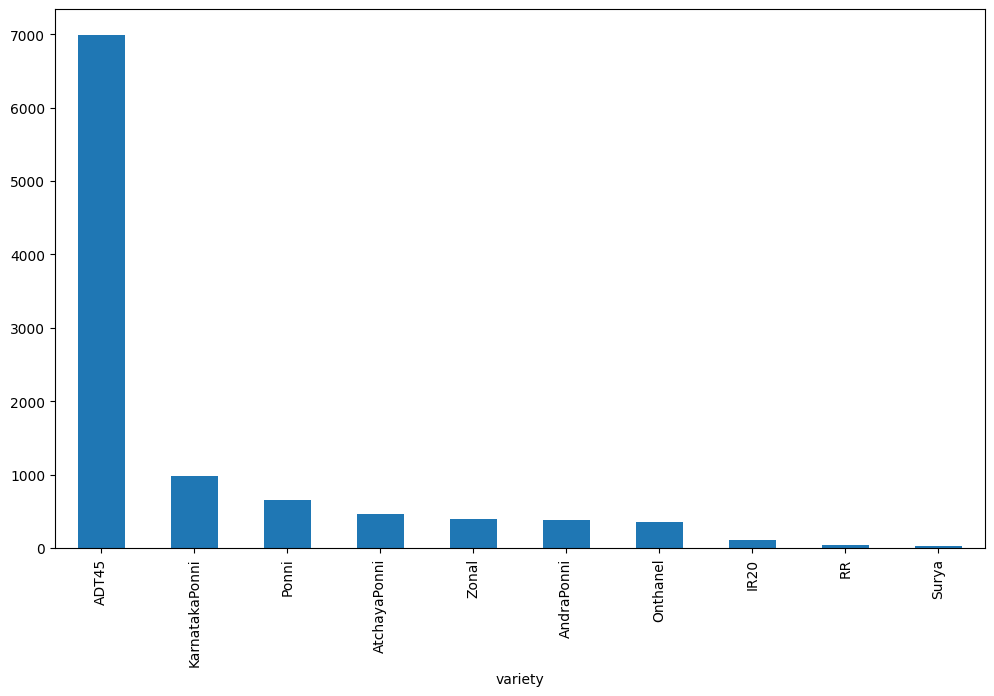

In [4]:
df["variety"].value_counts().plot(kind="bar", figsize=(12, 7))